In [108]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [109]:
df = pd.read_csv('listings (3).csv.gz')

In [110]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [111]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1489424,https://www.airbnb.com/rooms/1489424,20240214034713,2024-02-14,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,https://www.airbnb.com/users/show/5294164,Efrat,2013-03-02,"Albany, NY","I am originally from Brooklyn, New York. As an...",within an hour,100%,89%,f,https://a0.muscache.com/im/users/5294164/profi...,https://a0.muscache.com/im/users/5294164/profi...,NaN,1,2,"['email', 'phone']",t,t,"Albany, New York, United States",FOURTEENTH WARD,NaN,42.66719,-73.81580,Private room in home,Private room,2,1.0,1 private bath,1.0,1.0,"[""Fire extinguisher"", ""Free washer \u2013 In u...",$50.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2024-02-14,242,48,2,2013-09-10,2024-02-10,4.75,4.82,4.56,4.92,4.92,4.82,4.81,NaN,f,1,0,1,0,1.91
1,2992450,https://www.airbnb.com/rooms/2992450,20240214034713,2024-02-14,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,https://www.airbnb.com/users/show/4621559,Kenneth,2013-01-07,"New York, NY",I am a real down to earth & cool person.,within a day,100%,100%,f,https://a0.muscache.com/im/users/4621559/profi...,https://a0.muscache.com/im/users/4621559/profi...,NaN,1,5,"['email', 'phone']",t,f,NaN,THIRD WARD,NaN,42.65789,-73.75370,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Smoke alarm"", ""TV with standard cable"", ""Car...",$70.00,28,1125,28,28,1125,1125,28.0,1125.0,NaN,t,14,44,74,349,2024-02-14,9,0,0,2014-07-01,2022-08-17,3.56,3.44,3.56,4.22,4.56,3.22,3.67,NaN,f,1,1,0,0,0.08
2,3820211,https://www.airbnb.com/rooms/3820211,20240214034713,2024-02-14,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/678ed39b-74fd...,19648678,https://www.airbnb.com/users/show/19648678,Terra,2014-08-07,NaN,"I'm from Kansas City, MO. I've driven the enti...",within a day,90%,63%,f,https://a0.muscache.com/im/users/19648678/prof...,https://a0.muscache.com/im/users/19648678/prof...,Center Square & Hudson/Park,4,8,"['email', 'phone']",t,t,"Albany, New York, United States",SIXTH WARD,NaN,42.65222,-73.76724,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Free washer \u2013 In u...",$125.00,2,365,2,2,365,365,2.0,365.0,NaN,t,26,52,82,357,2024-02-14,291,8,0,2014-08-15,2023-11-19,4.74,4.89,4.87,4.86,4.80,4.82,4.78,NaN,f,4,4,0,0,2.52
3,5651579,https://www.airbnb.com/rooms/5651579,20240214034713,2024-

In [112]:
df.shape

(407, 75)

In [113]:
df.drop_duplicates(inplace=True)
#get rid of duplicates

In [114]:
#df.info()

In [148]:
#df.columns

In [116]:
###get rid of columns with high null ratio

In [117]:
df.drop(['calendar_updated','license','neighbourhood_group_cleansed','neighborhood_overview','host_about','host_location','host_neighbourhood'],inplace=True,axis=1)

In [118]:
df.drop(['neighbourhood','has_availability'],inplace=True,axis=1)

In [119]:
df.drop(['description','beds','bathrooms','bedrooms','host_response_time', 'host_response_rate','host_acceptance_rate', 'host_is_superhost'],inplace=True,axis=1)

In [120]:
df = df.dropna()
#get rid of any rows with null values
df.shape

(335, 58)

In [121]:
#df.isna().sum()

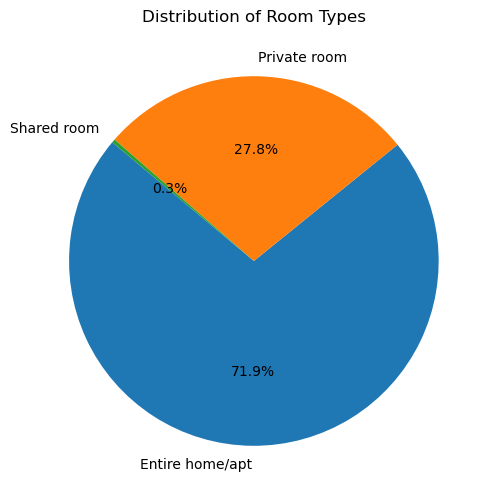

In [122]:
room_type_counts=df['room_type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of Room Types')


# Show plot
plt.show()

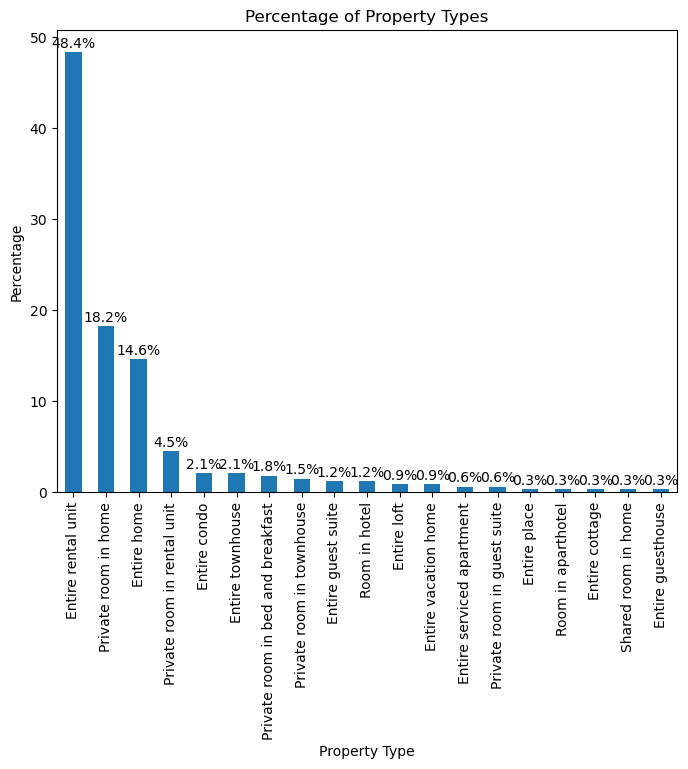

In [123]:
property_type_counts = df['property_type'].value_counts()

# Calculate the percentage of each property type
property_type_percentage = (property_type_counts / len(df)) * 100

# Create a histogram
plt.figure(figsize=(8, 6))
property_type_percentage.plot(kind='bar')

# Add labels and title
plt.xlabel('Property Type')
plt.ylabel('Percentage')
plt.title('Percentage of Property Types')

# Display the percentage values on top of the bars
for i, percentage in enumerate(property_type_percentage):
    plt.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center')

# Show plot
plt.show()

In [124]:
###this also show that the entire rental unit is the most common

In [125]:
df['price'] = df['price'].str.replace('$', '')

In [126]:
df['price'] = df['price'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

df['price'] = df['price'].astype(int)

In [127]:
df['review_scores_rating'].describe()

count    335.000000
mean       4.810448
std        0.248794
min        3.400000
25%        4.730000
50%        4.890000
75%        5.000000
max        5.000000
Name: review_scores_rating, dtype: float64

In [128]:
##the mean rating is so high and close to 5 and the standard ddeviation is low, it means that most hotels have high and close rating

In [129]:
df['price'].describe()

count     335.000000
mean      121.982090
std       108.470724
min        26.000000
25%        75.000000
50%       100.000000
75%       132.500000
max      1209.000000
Name: price, dtype: float64

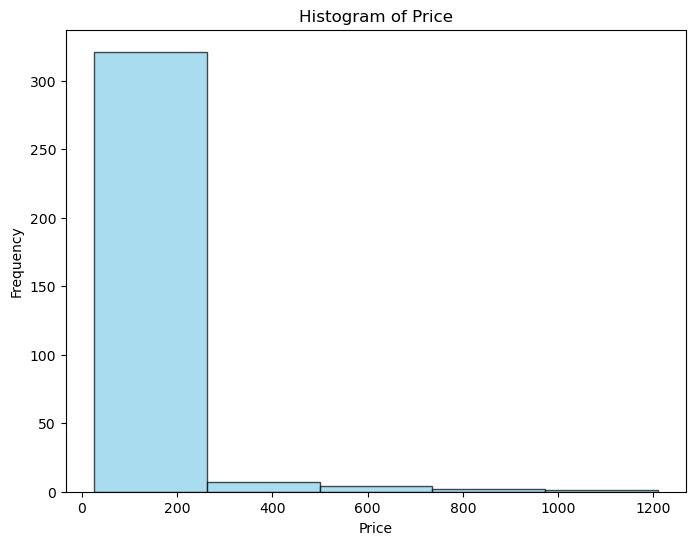

In [130]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Show plot
plt.show()

In [131]:
#####most of prices is less than 400

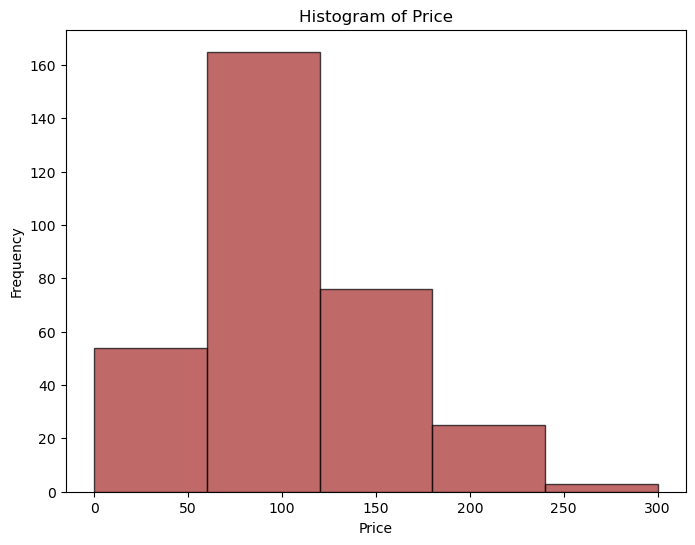

In [132]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=5, color='brown', edgecolor='black', alpha=0.7, range=(0, 300))

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Show plot
plt.show()

In [153]:
df =df[df['price']< 300]

In [136]:
df['price'].describe()

count    323.000000
mean     105.359133
std       46.370783
min       26.000000
25%       72.500000
50%      100.000000
75%      125.000000
max      299.000000
Name: price, dtype: float64

In [ ]:
##most of rooms have rent of around 100$ with mean 105$ and std 46

In [135]:
df.shape


(323, 58)

In [56]:
#with eleminating these few rows with extremly high prices, it has now better standard deviation

In [156]:
df =df[df['review_scores_rating'] >4.3]

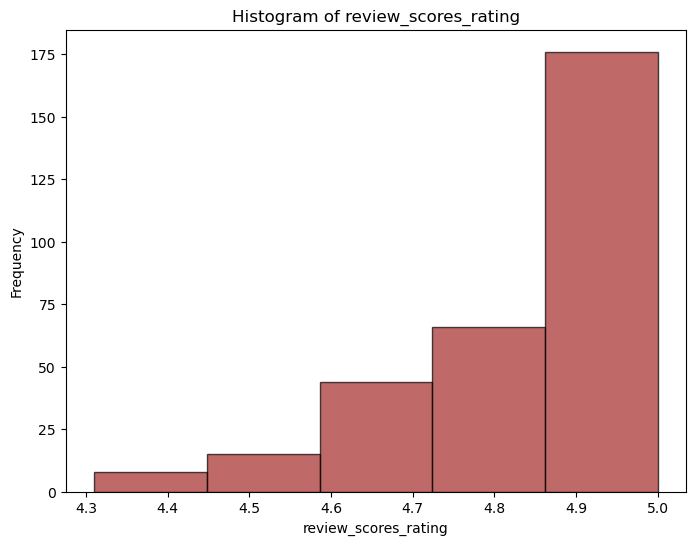

In [157]:

plt.figure(figsize=(8, 6))
plt.hist(df['review_scores_rating'], bins=5, color='brown', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('review_scores_rating')
plt.ylabel('Frequency')
plt.title('Histogram of review_scores_rating')

# Show plot
plt.show()

In [158]:
#most of rating is above 4.5

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


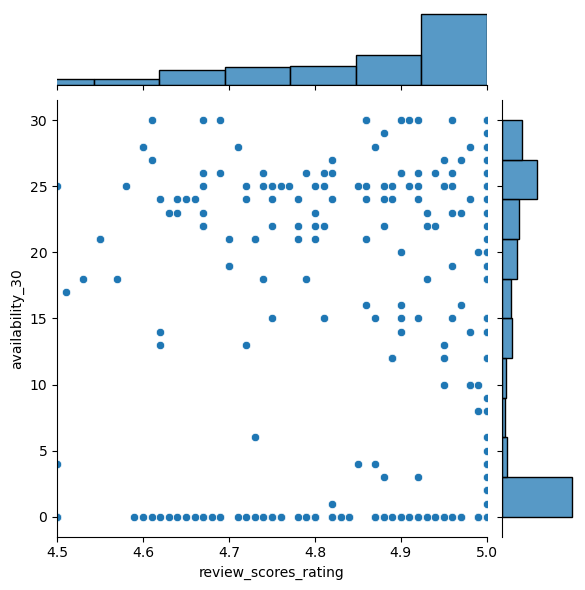

In [146]:
#sns.jointplot(x='review_scores_rating', y='availability_30', data=df, kind='scatter')
sns.jointplot(x='review_scores_rating', y='availability_30', data=df, kind='scatter', xlim=(4.5, 5.0))

plt.show()

In [24]:
#from the above scatter graph------> it appears that most of hotels are either fully booked for 30 days or have a few days booked,while scores dont have big effect

In [26]:
##when looking to smaller range, hotels are either fully booked in a month or at least half booked,while scores dont have big effect

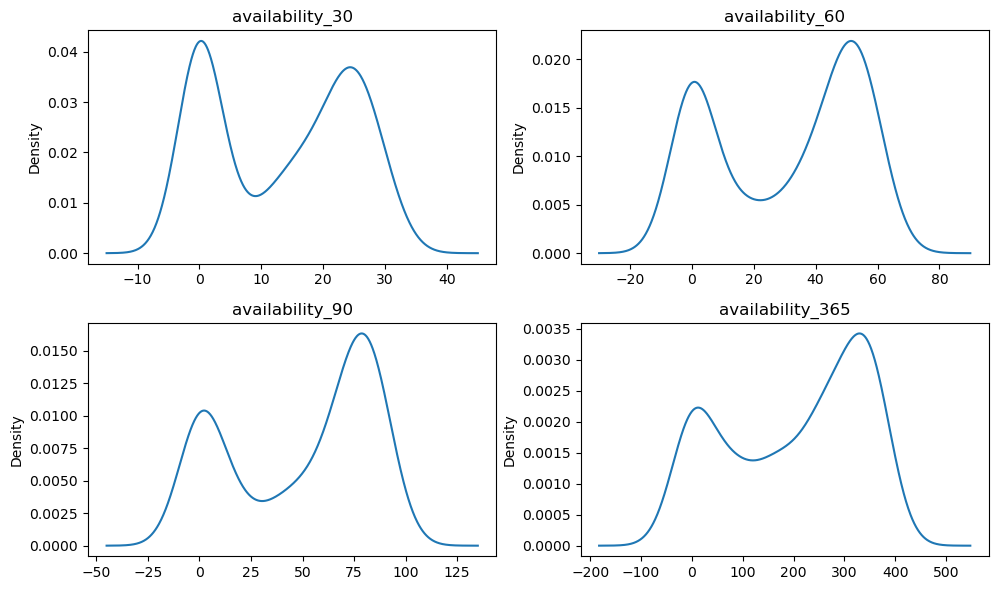

In [28]:
avail = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

# Create density plots for each availability type in separate subplots
plt.figure(figsize=(10, 6))

for i, a in enumerate(avail, 1):
    plt.subplot(2, 2, i)
    df[a].plot(kind='density')
    plt.title(a)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [29]:
#the 4 availability types have a clear drop in the middle of them, it means either the hotels are fully booked or not,
#,availabilty 30 is the only one that have higher peak at begaining more than at the end, it means most of the hotels are booked in a range of a month, but in a range of more than that more days appears not not be booked 

In [163]:
d={'t':True , 'f' :False}
#df['instant_bookable']= df['instant_bookable'].map(d)
df=df.replace({'instant_bookable':d})
#df['instant_bookable']

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


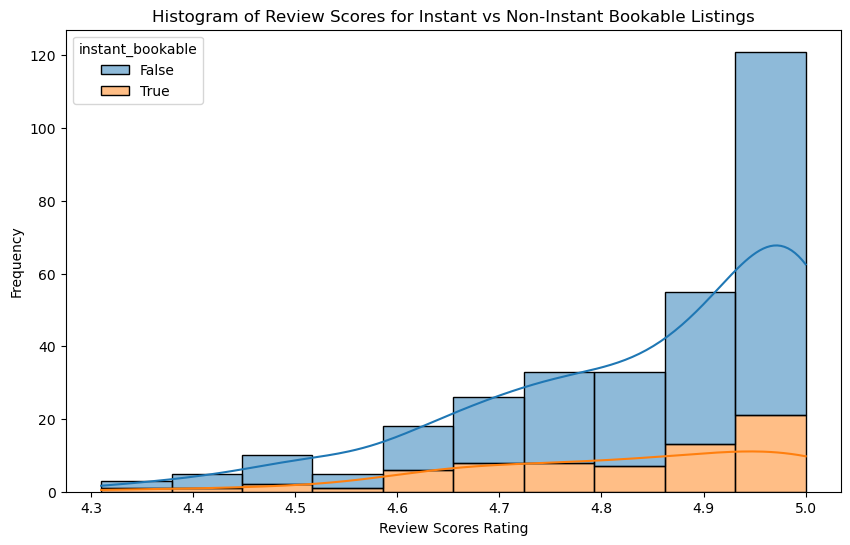

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_scores_rating', hue='instant_bookable', bins=10, kde=True, alpha=0.5, legend=True, multiple='stack')

# Add labels and title
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Review Scores for Instant vs Non-Instant Bookable Listings')

# Show plot
plt.show()

In [ ]:
#the instant bookability dosnt affect the rating where most of rooms with high rating dosnt have this feature

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


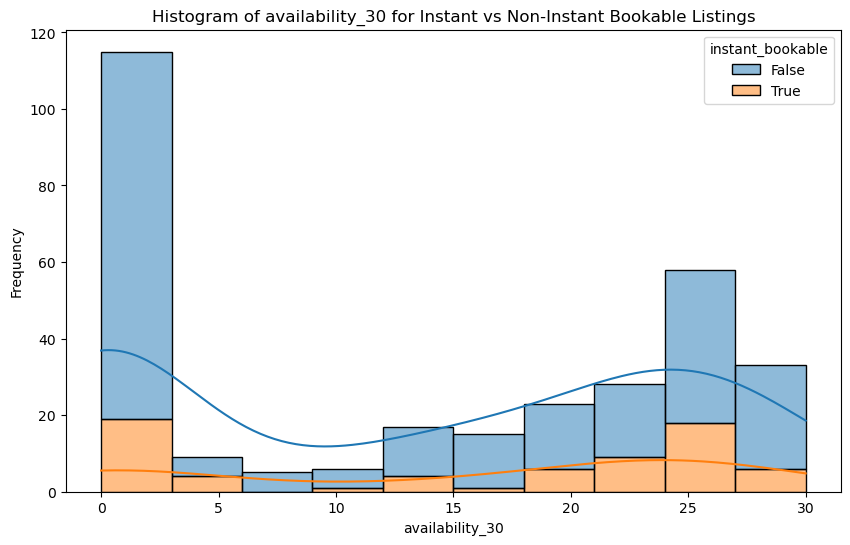

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='availability_30', hue='instant_bookable', bins=10, kde=True, alpha=0.5, legend=True, multiple='stack')

# Add labels and title
plt.xlabel('availability_30')
plt.ylabel('Frequency')
plt.title('Histogram of availability_30 for Instant vs Non-Instant Bookable Listings')

# Show plot
plt.show()

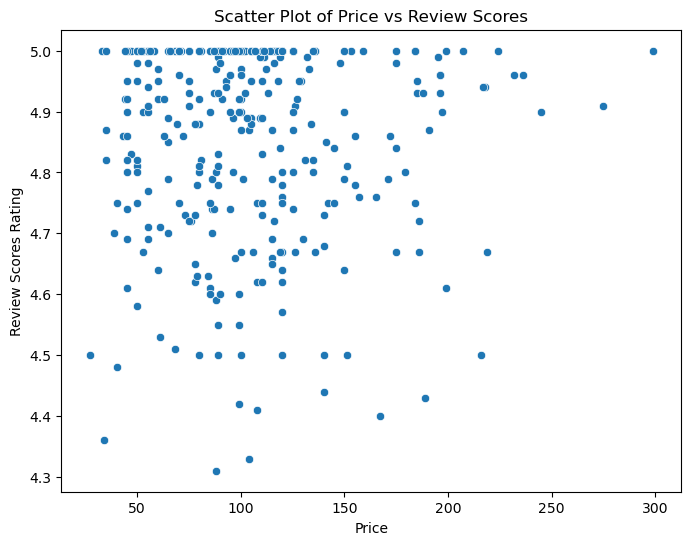

In [166]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='review_scores_rating', data=df)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Review Scores Rating')
plt.title('Scatter Plot of Price vs Review Scores')

# Show plot
plt.show()

In [167]:
#most of hotels have high score with low price, which says that all airbnb hotels have high quality

In [ ]:
#####Airbnb choose the best hotels with low price relative to the sevice and reviews, the instant bookability feature dont have large effect on the availability

In [ ]:
#####its obvious that airbnb choose hotels that only provide good service with relative low price although there are some rooms with very high price